# Analysis of the used Knowledge Graph

In [1]:
from grape import Graph, GraphVisualizer
import pandas as pd
from KG_analysis import *
import numpy as np
import sys
sys.path.append("..")
from GA4PHphenopackets_utils import *
from KG_utils import *

/home/luci/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nodes = pd.read_csv('../data/nodes_filtered.csv', low_memory=False)
edges = pd.read_csv('../data/edges_filtered.csv', low_memory=False)

In [3]:
len(nodes), len(edges)

(111867, 1318819)

In [4]:
nodes.head()

name             type
0  <http://purl.obolibrary.org/obo/HP_0034821>        Phenotype
1  <http://purl.obolibrary.org/obo/SO_0001953>  Genomic feature
2  <http://purl.obolibrary.org/obo/HP_0030635>        Phenotype
3  <http://purl.obolibrary.org/obo/GO_0010501>               GO
4  <http://purl.obolibrary.org/obo/GO_1904211>               GO

In [5]:
edges.head()

subject      predicate  \
0     <http://purl.obolibrary.org/obo/HP_0008255>   Phenotype of   
1  <http://purl.obolibrary.org/obo/MONDO_0030335>  Has phenotype   
2  <http://purl.obolibrary.org/obo/MONDO_0009566>  Has phenotype   
3  <http://purl.obolibrary.org/obo/MONDO_0010046>  Has phenotype   
4  <http://purl.obolibrary.org/obo/MONDO_0018846>  Has phenotype   

                                           object  
0  <http://purl.obolibrary.org/obo/MONDO_0012522>  
1     <http://purl.obolibrary.org/obo/HP_0005208>  
2     <http://purl.obolibrary.org/obo/HP_0003100>  
3     <http://purl.obolibrary.org/obo/HP_0001844>  
4     <http://purl.obolibrary.org/obo/HP_0100590>

In [3]:
g = get_grape_graph(nodes, edges, 'KG')

In [ ]:
g

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>KG</h2><p class="paragraph">The directed multigraph KG has 111.87K heterogeneous nodes and 1.32M heterogeneous edges. The RAM requirements for the nodes and edges data structures are 24.98MB and 6.17MB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 0, the maximum node degree is 12.79K, the mode degree is 0, the mean degree is 11.79 and the node degree median is 1.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='http://purl.obolibrary.org/obo/SO_0001217' target='_blank' title='Go to website to get more informations about &lt;http:&#x2f;&#x2f;purl.obolibrary.org&#x2f;obo&#x2f;SO_0001217&gt;'>&lt;http:&#x2f;&#x2f;purl.obolibrary.org&#x2f;obo&#x2f;SO_0001217&gt;</a> (degree 12.79K and node type Genomic feature), <a href='http://purl.obolibrary.org/obo/GO_0065007' target='_blank' title='Go to website to get more informations about &lt;http:&#x2f;&#x2f;purl.obolibrary.org&#x2f;obo&#x2f;GO_0065007&gt;'>&lt;http:&#x2f;&#x2f;purl.obolibrary.org&#x2f;obo&#x2f;GO_0065007&gt;</a> (degree 7.69K and node type GO), <a href='http://purl.obolibrary.org/obo/PATO_0000460' target='_blank' title='Go to website to get more informations about &lt;http:&#x2f;&#x2f;purl.obolibrary.org&#x2f;obo&#x2f;PATO_0000460&gt;'>&lt;http:&#x2f;&#x2f;purl.obolibrary.org&#x2f;obo&#x2f;PATO_0000460&gt;</a> (degree 6.20K and node type Phenotype), <a href='http://purl.obolibrary.org/obo/HP_0001249' target='_blank' title='Go to website to get more informations about &lt;http:&#x2f;&#x2f;purl.obolibrary.org&#x2f;obo&#x2f;HP_0001249&gt;'>&lt;http:&#x2f;&#x2f;purl.obolibrary.org&#x2f;obo&#x2f;HP_0001249&gt;</a> (degree 4.87K and node type Phenotype) and <a href='http://purl.obolibrary.org/obo/HP_0001263' target='_blank' title='Go to website to get more informations about &lt;http:&#x2f;&#x2f;purl.obolibrary.org&#x2f;obo&#x2f;HP_0001263&gt;'>&lt;http:&#x2f;&#x2f;purl.obolibrary.org&#x2f;obo&#x2f;HP_0001263&gt;</a> (degree 4.78K and node type Phenotype).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 7 node types, which are GO (40.76K nodes, 36.43%), Disease (25.92K nodes, 23.17%), Phenotype (19.62K nodes, 17.54%), Genomic feature (16.06K nodes, 14.36%), Person (7.80K nodes, 6.97%), Article (1.13K nodes, 1.01%) and Protein (566 nodes, 0.51%). The RAM requirement for the node types data structure is 7.16MB.</p><h3 style="margin: 1em 0 0 0;">Edge types</h3><p class="paragraph">The graph has 107 edge types, of which the 10 most common are Has phenotype (516.81K edges, 39.19%), Phenotype of (516.81K edges, 39.19%), Subclassof (177.50K edges, 13.46%), Causes or contributes to condition (38.94K edges, 2.95%), Part of (14.69K edges, 1.11%), Has part (8.90K edges, 0.67%), Has disease (7.80K edges, 0.59%), Has modifier (6.42K edges, 0.49%), Has quality (6.15K edges, 0.47%) and Has material basis in germline mutation in (4.83K edges, 0.37%). The RAM requirement for the edge types d

## Type distribution

### Node types

logarithmic distribution of node types

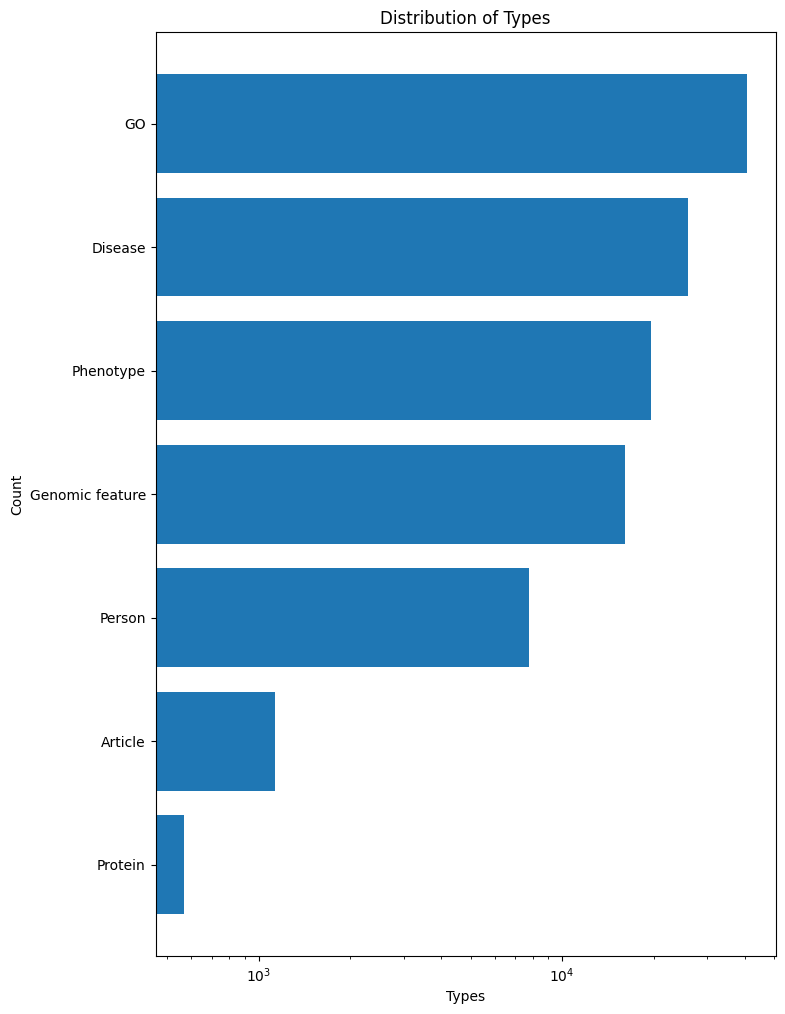

In [ ]:
type_counts = nodes['type'].value_counts()
plot_node_type_distribution(type_counts)

#### Percentage of links per node type

In [ ]:
n_edges_for_node_type = get_n_edges_for_node_type(edges, nodes)

In [ ]:
total_sum = n_edges_for_node_type.sum().sum()
percentage_total = (n_edges_for_node_type / total_sum) * 100

In [ ]:
import numpy as np

7
[np.float64(34.4941951852377), np.float64(34.36862829546739), np.float64(7.5707887132351), np.float64(4.818553569519396), np.float64(4.818553569519396), np.float64(3.434208939968259), np.float64(2.9400547004554833), np.float64(1.8591633878492804), np.float64(1.8290606974876764), np.float64(1.0932508555002618), np.float64(0.5913624235016328), np.float64(0.5913624235016328), np.float64(0.5913624235016328), np.float64(0.4745154566320321), np.float64(0.37116541390440994), np.float64(0.04693593283081302), np.float64(0.03950504201107203), np.float64(0.030557642860771644), np.float64(0.01721236955184904)]


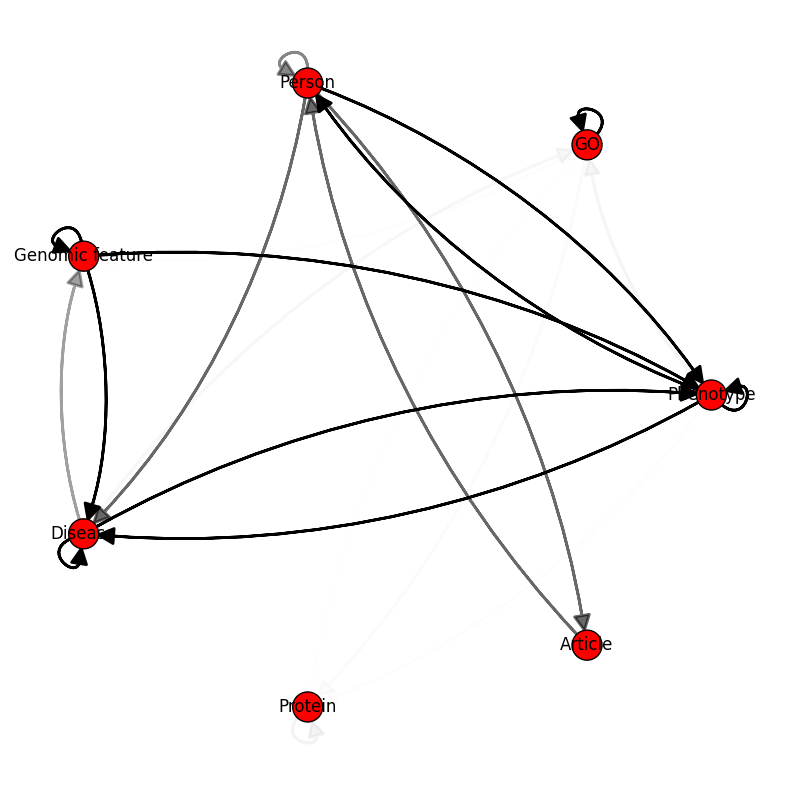

In [ ]:
weighed_hypergraph_node_types(percentage_total, 'circle')

For each node type the outward links are weighed on the number of links towards other node types.

In [ ]:
# total_sum = links_per_node_t.sum(axis=1)
# percentage_link_counts = (links_per_node_t / total_sum) * 100

In [ ]:
# weighed_hypergraph_node_types(percentage_link_counts, layout='kk')

### Edge predicates

In the following plot the node types for each edge type refer to the type of start and arrival nodes.

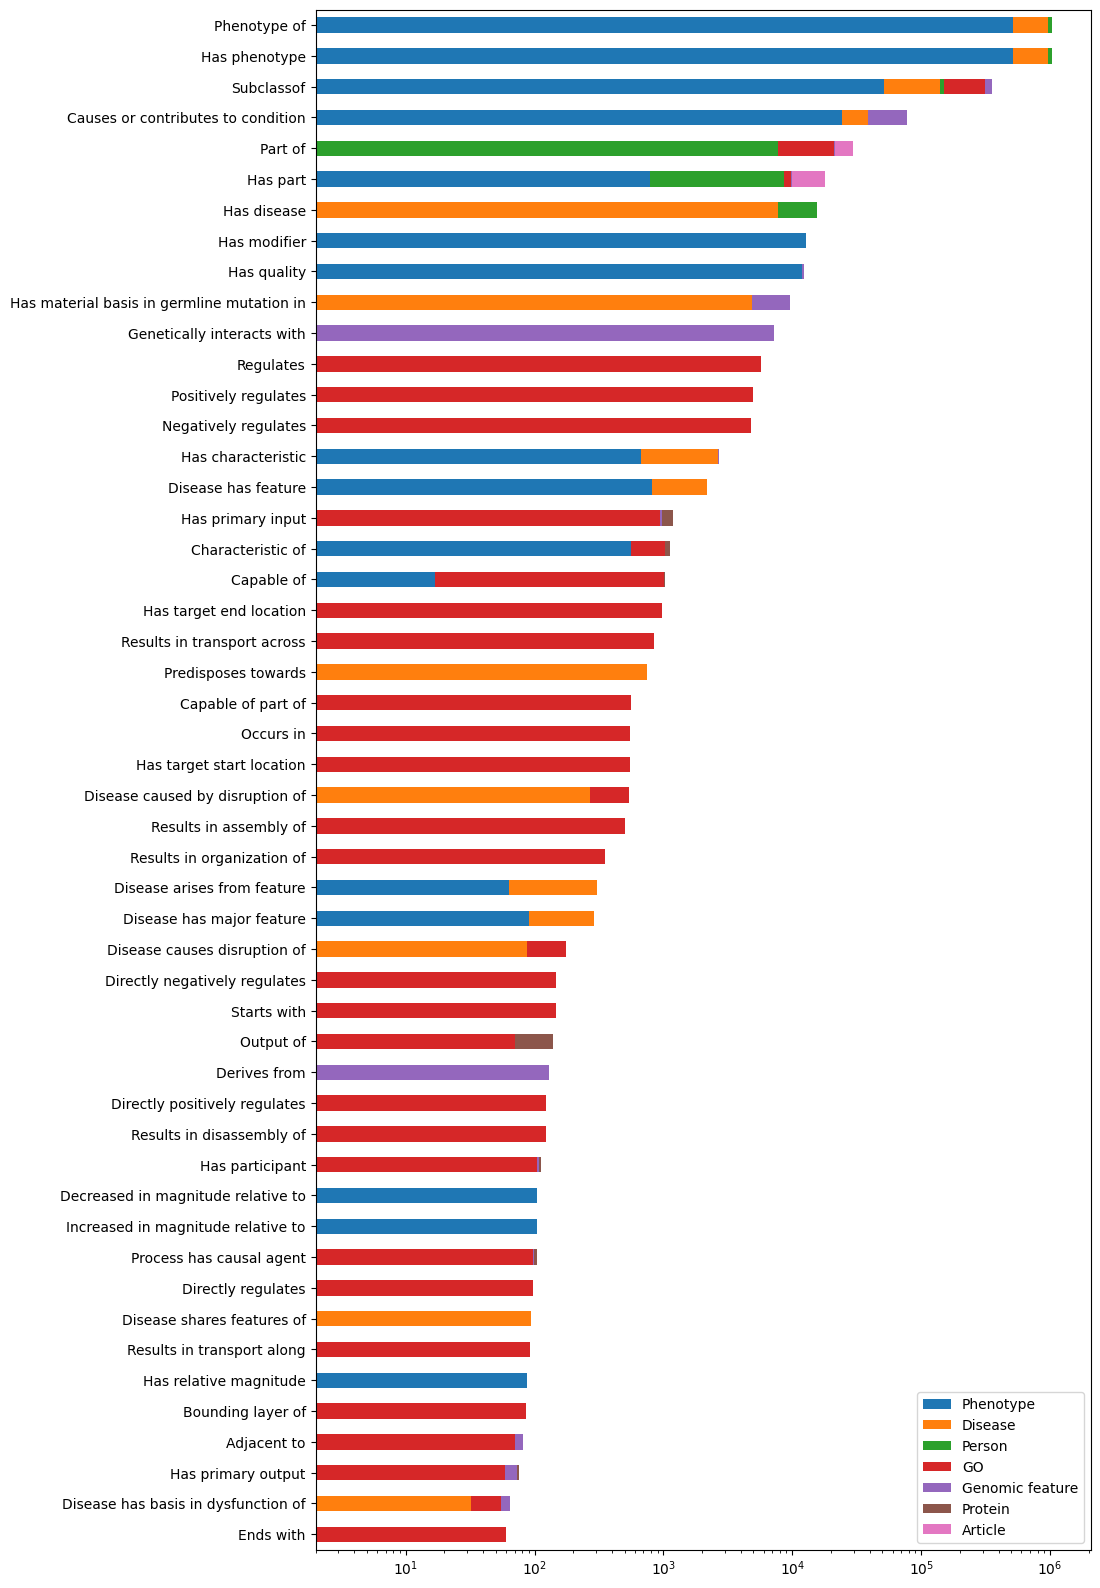

In [ ]:
data = pd.DataFrame()
for type in edges['predicate'].value_counts().index[:50]:
    edge_type_data = get_node_types_for_edge_type(edges, nodes, type)
    data = pd.concat([data, edge_type_data], axis=1)
    
data = data.T
    
plot_type_distribution_with_components(data)

In [ ]:
# type_counts = edges['predicate'].value_counts()[:50]
# plot_node_type_distribution(type_counts)

## Width measures

### Diameter

In [ ]:
# diameter = g.get_diameter()
# print(f"Diameter: {diameter}")

## Connectivity

### Neighbourhood size distribution

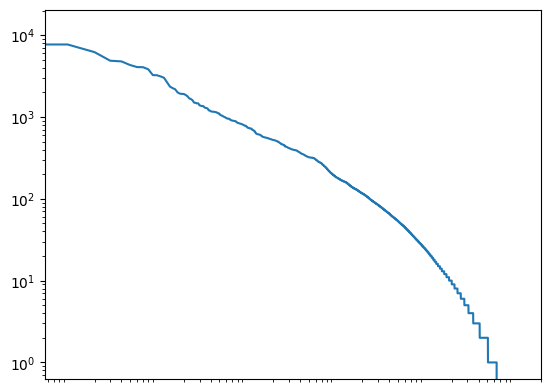

In [ ]:
import matplotlib.pyplot as plt

neighborhood_sizes = {node: g.get_node_degree_from_node_name(node) for node in nodes['name']}

fig, ax = plt.subplots()
plot_distribution(ax, neighborhood_sizes.values(), x_scale = 'log', y_scale='log')

### Neighbourhood size distribution per node type

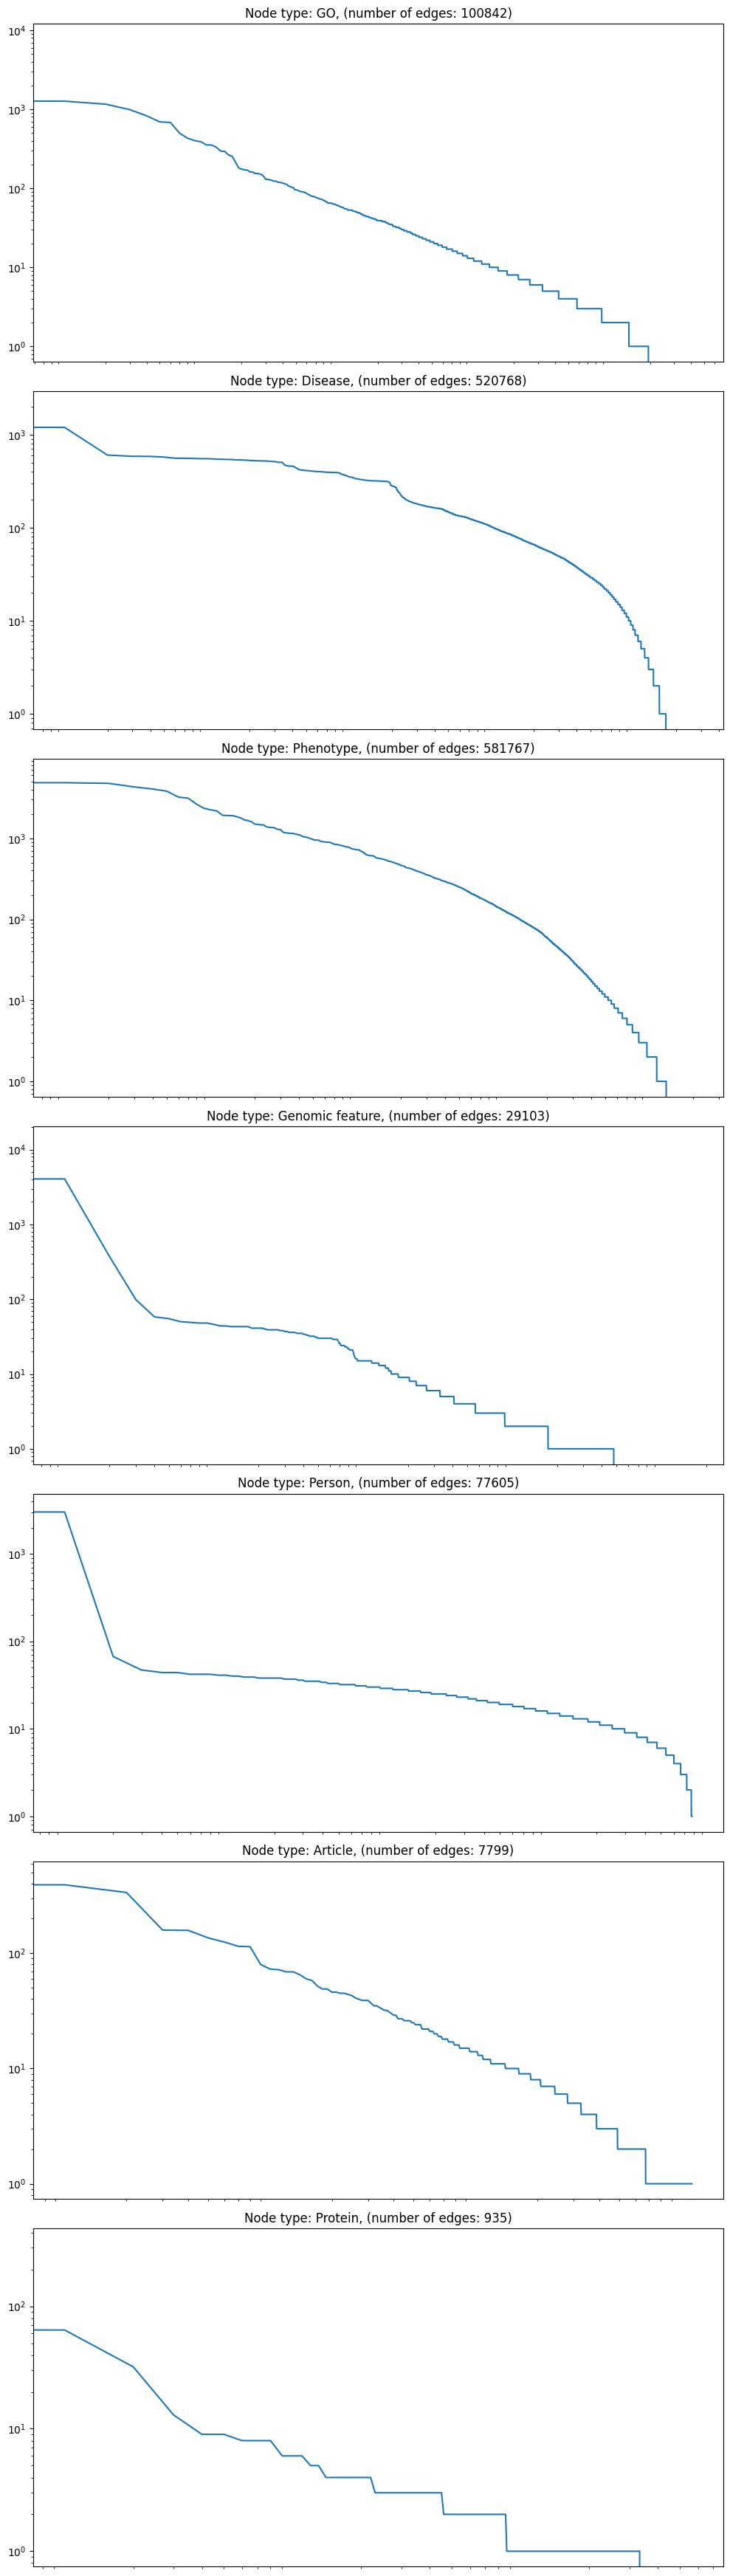

In [ ]:
node_types_vc = nodes['type'].value_counts()
node_types = node_types_vc[node_types_vc > 200].index
fig, axes = plt.subplots(len(node_types), 1, figsize=(10, 5*len(node_types)))
for ax, node_type in zip(axes, node_types):
    neighborhood_sizes = {node: g.get_node_degree_from_node_name(node) for node in nodes[nodes['type']==node_type]['name']}
    ax.set_title(f"Node type: {node_type}, (number of edges: {sum(neighborhood_sizes.values())})")
    plot_distribution(ax, neighborhood_sizes.values(), x_scale = 'log', y_scale='log')
plt.tight_layout()
plt.show()   

### Complementary Cumulative node distribution function

![](./figs/CCD_loglog.png)

### Connected components

In [ ]:
comp = g.get_number_of_connected_components()
print(f"Number of components: {comp[0]}\nNumber of nodes of the smallest component: {comp[1]}\nNumber of nodes of the biggest component: {comp[2]}")

Number of components: 128
Number of nodes of the smallest component: 1
Number of nodes of the biggest component: 111740


### Centrality

In [ ]:
import networkx as nx
G = nx.Graph()

for idx, row in nodes.iterrows():
    G.add_node(row['name'])

for idx, row in edges.iterrows():
    G.add_edge(row['subject'], row['object'])

#### Closeness centrality

In [ ]:
closeness_centrality = nx.closeness_centrality(G)

KeyboardInterrupt: 

In [ ]:
closeness_centrality

Some of the nodes with highest closeness centrality

In [ ]:
node_closeness_centrality={}
for centr in closeness_centrality.nonzero()[0]:
    node_closeness_centrality[g.get_node_name_from_node_id(centr)]=closeness_centrality[centr]
    
nodes_closeness_centr_1 = []
for key, value in node_closeness_centrality.items():
    if value ==1:
        nodes_closeness_centr_1.append(key)
        print(f"{key}: {value}")

<http://purl.obolibrary.org/obo/PR_000043907>: 1.0
<http://purl.obolibrary.org/obo/PR_000042077>: 1.0
<http://purl.obolibrary.org/obo/GO_1905177>: 1.0
<http://purl.obolibrary.org/obo/PR_000042701>: 1.0
<http://purl.obolibrary.org/obo/SO_0001173>: 1.0
<http://purl.obolibrary.org/obo/PR_000025032>: 1.0
<http://purl.obolibrary.org/obo/PR_000038233>: 1.0
<http://purl.obolibrary.org/obo/PR_000019981>: 1.0
<http://purl.obolibrary.org/obo/GO_0043669>: 1.0
<http://purl.obolibrary.org/obo/MONDO_0003665>: 1.0
<http://purl.obolibrary.org/obo/PR_000038925>: 1.0
<http://purl.obolibrary.org/obo/PR_000038500>: 1.0
<http://purl.obolibrary.org/obo/PR_000041737>: 1.0
<http://purl.obolibrary.org/obo/PR_000000693>: 1.0
<http://purl.obolibrary.org/obo/PR_000028576>: 1.0
<http://purl.obolibrary.org/obo/PR_000040566>: 1.0
<http://purl.obolibrary.org/obo/GO_0015133>: 1.0
<http://purl.obolibrary.org/obo/MONDO_0008661>: 1.0
<http://purl.obolibrary.org/obo/PR_000041901>: 1.0
<http://purl.obolibrary.org/obo/GO_00

In [ ]:
print(max(neighborhood_sizes))
for node in nodes_closeness_centr_1:
    print(f"{node} \tdegree:{g.get_node_degree_from_node_name(node)}")

STX_s010
<http://purl.obolibrary.org/obo/PR_000043907> 	degree:1
<http://purl.obolibrary.org/obo/PR_000042077> 	degree:1
<http://purl.obolibrary.org/obo/GO_1905177> 	degree:1
<http://purl.obolibrary.org/obo/PR_000042701> 	degree:1
<http://purl.obolibrary.org/obo/SO_0001173> 	degree:1
<http://purl.obolibrary.org/obo/PR_000025032> 	degree:1
<http://purl.obolibrary.org/obo/PR_000038233> 	degree:1
<http://purl.obolibrary.org/obo/PR_000019981> 	degree:1
<http://purl.obolibrary.org/obo/GO_0043669> 	degree:1
<http://purl.obolibrary.org/obo/MONDO_0003665> 	degree:1
<http://purl.obolibrary.org/obo/PR_000038925> 	degree:1
<http://purl.obolibrary.org/obo/PR_000038500> 	degree:1
<http://purl.obolibrary.org/obo/PR_000041737> 	degree:1
<http://purl.obolibrary.org/obo/PR_000000693> 	degree:1
<http://purl.obolibrary.org/obo/PR_000028576> 	degree:1
<http://purl.obolibrary.org/obo/PR_000040566> 	degree:1
<http://purl.obolibrary.org/obo/GO_0015133> 	degree:1
<http://purl.obolibrary.org/obo/MONDO_0008661>

#### Degree centrality

Look at grape description of graph.

## Clusterability

### Global clustering coefficient

In [ ]:
g.get_transitivity()

0.004560263672711607

### Distribution local clustering coefficients

In [ ]:
node_clustering_coefficients = nx.clustering(G)

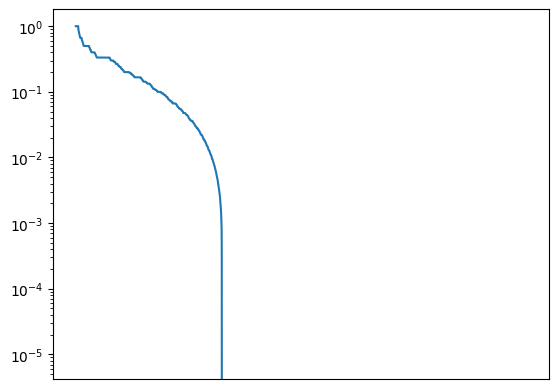

In [ ]:
fig,ax = plt.subplots()

plot_distribution(ax, list(node_clustering_coefficients.values()), x_scale = 'log', y_scale='log')

## Visualization through embedding

In [4]:
def filter_embedding_disconnected_nodes(g, emb_file_name):
    emb = pd.read_csv(f'{emb_file_name}.csv').to_numpy()
    conn_comp_id = g.get_node_connected_component_ids()
    unique_indices = np.where(np.bincount(conn_comp_id) == 1)[0]
    indexes = np.where(np.isin(conn_comp_id, unique_indices))[0]
    emb_filtered = np.delete(emb, indexes, axis=0)
    pd.DataFrame(emb_filtered).to_csv(f'{emb_file_name}_filtered.csv', index=False)

In [5]:
for file in ['embedding_hetnode2vec_node2vec', 'embedding_hetnode2vec_deep_walk', 'embedding_LINE']:
    filter_embedding_disconnected_nodes(g, file)
g_connected_unidirected = g.remove_disconnected_nodes().to_undirected()

### Hetnode2vec - Node2vec

$$\text{embedding size: }100 \\
1/p = 0.25 \\
1/q = 4\\
1/s = 1$$

/home/luci/.local/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


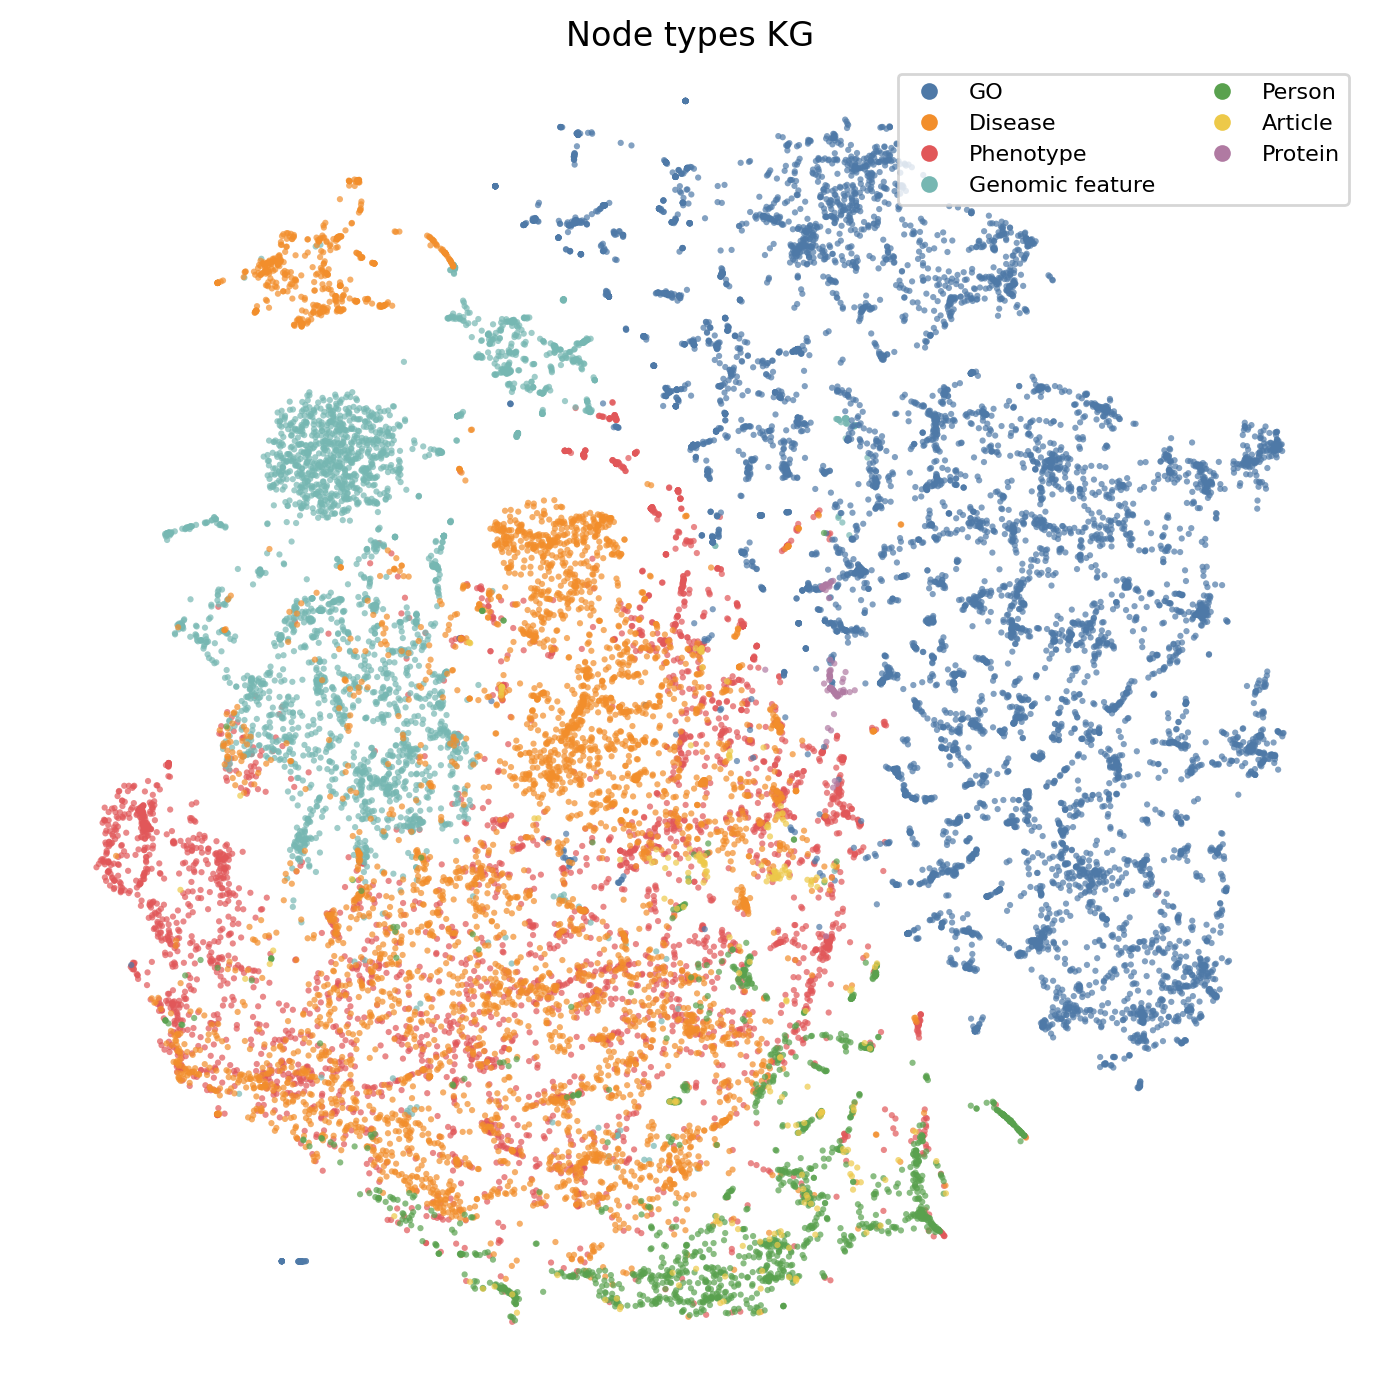

In [6]:
visualize_embedding(get_embedding(g_connected_unidirected, emb_file_name='embedding_hetnode2vec_node2vec_filtered'), g_connected_unidirected)

### Hetnode2vec - DeepWalk

$$\text{embedding size: }100 \\
1/p = 1 \\
1/q = 1\\
1/s = 1$$

/home/luci/.local/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


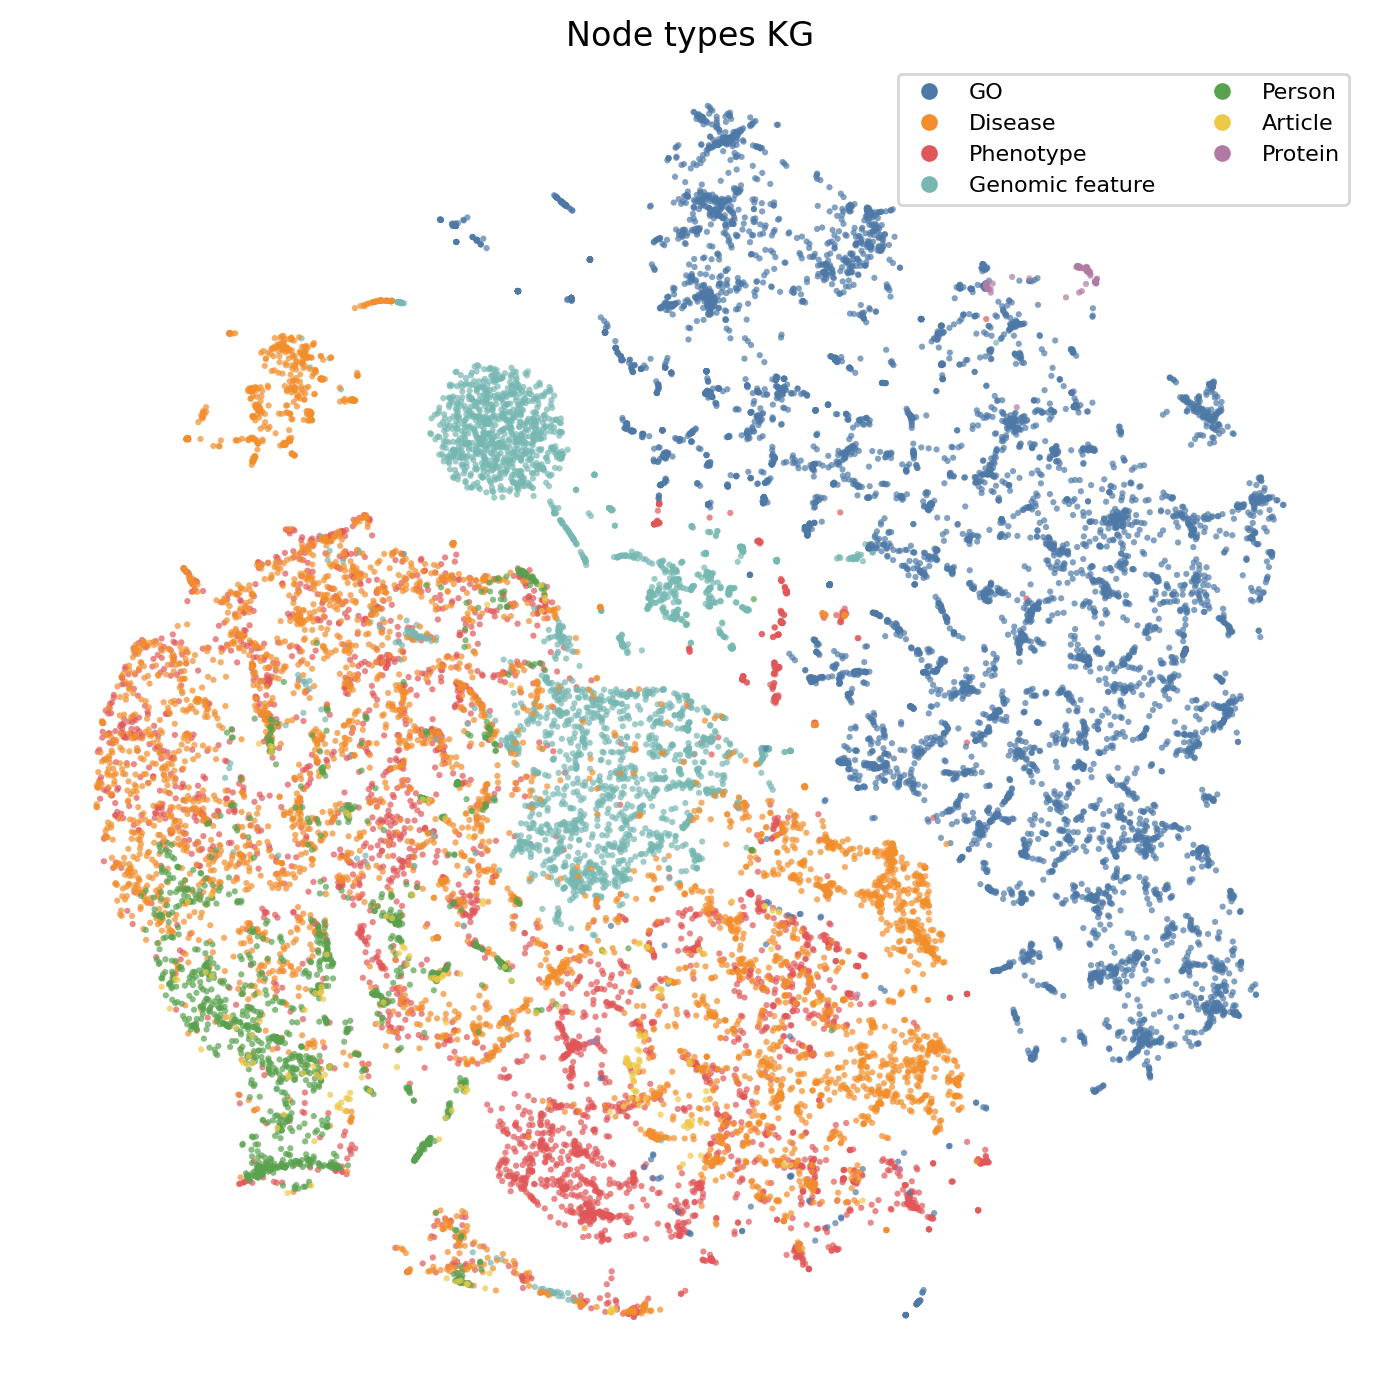

In [7]:
visualize_embedding(get_embedding(g_connected_unidirected, emb_file_name='embedding_hetnode2vec_deep_walk_filtered'), g_connected_unidirected)

### LINE

$$\text{embedding size: }100 $$

/home/luci/.local/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


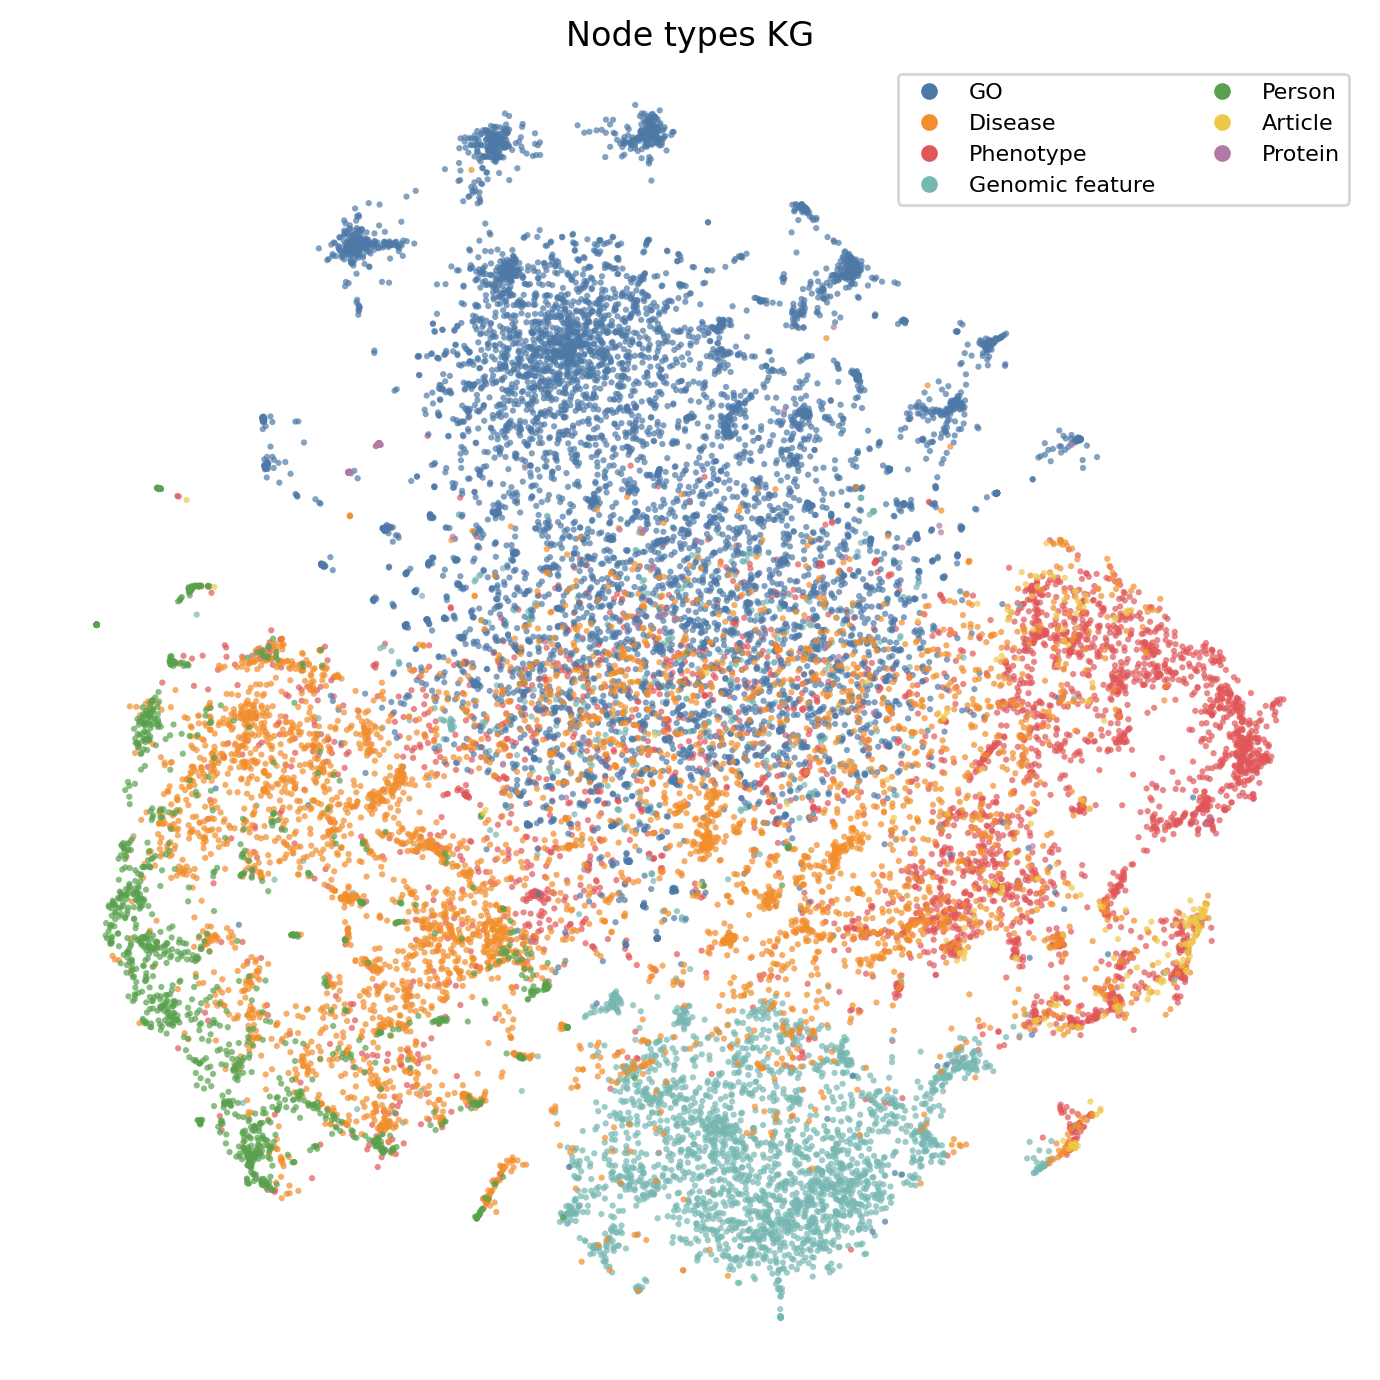

In [8]:
visualize_embedding(get_embedding(g_connected_unidirected, emb_file_name='embedding_LINE_filtered'), g_connected_unidirected)

## Tree-likeness

### Tree width

In [ ]:
treewidth, decomposition = nx.approximation.treewidth_min_degree(G)

print(f"Approximate treewidth of the graph: {treewidth}")

: 